# Deep Learning with Python
3.4 Classifying movie reviews: a binary classification example

Antes de mais nada os notebooks aqui mostrado tiveram como base/foram retirados dos seguintes repositórios: 
 > https://github.com/fchollet/deep-learning-with-python-notebooks 
 
 
 > https://github.com/cdfmlr/Deep-Learning-with-Python-Notebooks
 
 Sugiro fortemente que consultem os códigos originais e em caso de dúvida podem me contatar para conversarmos. 

### Conjunto de dados IMDB

Existem 50.000 críticas de filmes no conjunto de dados IMDB. Metade é o conjunto de treinamento e a outra metade é o conjunto de teste. Nos dados, 50% são críticas positivas e 50% são críticas negativas.

Keras incorporou o conjunto de dados IMDB pré-processado, que converte a sequência de palavras em uma sequência inteira (um número corresponde a uma palavra no dicionário):

In [1]:
#Importando o conjunto de dados:
from tensorflow.keras.datasets import imdb

# conjunto de dados
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

C:\Users\Lenovo\Anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Lenovo\Anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


num_words = 10000 é para manter apenas as 10.000 palavras principais na frequência.

Vamos ler um comentário, este é um bom comentário:

In [2]:
# Dicionário
index_word = {v: k for k, v in imdb.get_word_index().items()}

# Vamos decodificar um dos reviews para o inglês
text = ' '.join([index_word[i] for i in train_data[0]])

print(f"{train_labels[0]}:", text)

1: the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have

Podemos perceber que algumas palavras podem "classificar" o review em algo positivo ou negativo. O exemplo acima é de uma resenha positiva! 

# Preparação de dados
Vamos dar uma olhada na forma atual de train_data:

In [3]:
train_data.shape

(25000,)


Queremos que tenha a aparência de (samples, word_indices), que provavelmente é o seguinte:
[[0, 0, ..., 1, ..., 0, ..., 1],
 [0, 1, ..., 0, ..., 1, ..., 0],
 ...
]


Significa 1 se houver esta palavra e 0 se não houver nenhuma palavra.

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

No caso dos rótulos eles já são assim, todos em 0 ou 1. Sendo 0 resenha positiva e 1 resenha negativa. 

In [6]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Agora, esses dados podem ser alimentados com segurança para a rede neural que construiremos em breve.

# Construção do modelo


Vamos agora construir a nossa rede neural


Para este tipo de problema onde a entrada é um vetor e o rótulo é um escalar (mesmo 0 ou 1) é utilizado uma rede empilhada (ou seja, uma sequencia de camadas) usando Dense ativada pela função relu, como a seguir:

Dense(16, activation='relu')

A função desta camada é saída = relu (ponto (W, entrada) + b).

16 é o número de unidades ocultas em cada camada. Uma unidade oculta é uma dimensão no espaço de representação dessa camada. A forma de W também é (input_dimension, 16). O ponto é um vetor de 16 dimensões, que projeta os dados em um espaço de representação de 16 dimensões.

Esta dimensão (o número de unidades ocultas) pode ser considerada como o controle do grau de liberdade de aprendizagem em rede. Quanto maior a dimensionalidade, mais complicadas as coisas podem ser aprendidas, mas mais caro do ponto de vista computacional, e algumas coisas sem importância podem ser aprendidas e acabar causando o overfitting.

Aqui, usaremos duas camadas de 16 unidades ocultas e, finalmente, uma camada ativada por sigmóide para gerar o resultado (valor em $ [0, 1] $), este resultado indica a probabilidade de os dados preverem O rótulo é 1, o que é um bom comentário

Sobre as funções de ativação: 
relu é filtrar os valores negativos (saída do valor negativo da entrada como 0), sigmóide é converter o valor para [0, 1]. 

In [9]:
# Realizando a importação dos modelos e das camadas
from tensorflow.keras import models
from tensorflow.keras import layers


#Construindo a arquitetura do modelo: 
model = models.Sequential()  #modelo do tipo sequencial
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### O papel da função de ativação

Usamos a função de ativação relu no MNIST antes, então o que a função de ativação faz?

Uma camada Densa sem função de ativação é apenas uma transformação linear:

saída = ponto (W, entrada) + b

Se cada camada for esse tipo de transformação linear, e várias camadas desse tipo forem empilhadas, o espaço da hipótese não se tornará maior, então as coisas que podem ser aprendidas são muito limitadas.

A função de ativação é uma função fora do ponto (W, entrada) + b. Por exemplo, a ativação de relu é saída = relu (ponto (W, entrada) + b). Usando esta função de ativação, o espaço de representação pode ser expandido e a rede pode aprender "conhecimentos" mais complexos.

Para saber mais pode consultar aqui: http://deeplearningbook.com.br/funcao-de-ativacao/

### Compilando o modelo

Ao compilar o modelo, também precisamos selecionar a função de perda, otimizador e o indicador da rede.

Para este tipo de problema de classificação binária, onde a saída final é 0 ou 1, a função de perda pode usar binary_crossentropy (você pode ver pelo nome que é muito adequado por ser binário).

Essa entropia cruzada (binary crossentropy) é chamada de entropia cruzada em chinês e é usada na teoria da informação para medir a distância direta da distribuição de probabilidade. Portanto, o modelo de probabilidade de saída geralmente usa esse tipo de entropia cruzada para perdas.

Quanto ao otimizador, como MNIST, usamos rmsprop, e o índice ainda é de acurácia:

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
#Definindo os parâmetros: 
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

# Modelo de treinamento

A fim de verificar a precisão do modelo nos dados que ele não viu durante o processo de treinamento, dividimos 10.000 amostras dos dados de treinamento originais:

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Use um lote de 512 amostras de minilotes, execute 20 epocas (todos os dados em x_train são executados uma vez e contam uma rodada) e use as 10.000 amostras recém-separadas para verificação de acurácia (precisão):

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

#Agora sim, vamos realizar o famigerado "fit":
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 435us/sample - loss: 0.5036 - acc: 0.7937 - val_loss: 0.3752 - val_acc: 0.8714
Epoch 2/20
15000/15000 [==============================] - 2s 156us/sample - loss: 0.2981 - acc: 0.9046 - val_loss: 0.3402 - val_acc: 0.8609
Epoch 3/20
15000/15000 [==============================] - 2s 118us/sample - loss: 0.2188 - acc: 0.9285 - val_loss: 0.2767 - val_acc: 0.8893
Epoch 4/20
15000/15000 [==============================] - 2s 130us/sample - loss: 0.1717 - acc: 0.9440 - val_loss: 0.3080 - val_acc: 0.8753
Epoch 5/20
15000/15000 [==============================] - 3s 194us/sample - loss: 0.1378 - acc: 0.9561 - val_loss: 0.2986 - val_acc: 0.8832
Epoch 6/20
15000/15000 [==============================] - 3s 175us/sample - loss: 0.1166 - acc: 0.9635 - val_loss: 0.2960 - val_acc: 0.8863
Epoch 7/20
15000/15000 [==============================] - 3s 175us/sample - loss: 0.0960 - acc: 0.9702 - val_l

In [14]:
#Através da função abaixo podemos consultar alguns valores do histórico de treinamento
#é basicamente um dicionário contendo todos os dados sobre tudo que aconteceu ao longo do treinamento
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

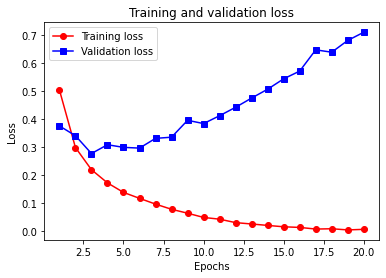

In [15]:
#Vamos usar o matplotlib para plotar um gráfico de perda de treinamento e validação ao longo do treinamento

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro-', label='Training loss')
plt.plot(epochs, val_loss_values, 'bs-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

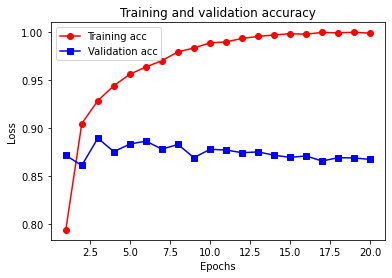

In [16]:
# Desenhe a precisão do treinamento e verificação
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'ro-', label='Training acc')
plt.plot(epochs, val_acc, 'bs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Podemos ver que a acurácia no set de treinamento tem aumentado (a perda vem diminuindo), mas no set de validação a perda aumentou posteriormente, e atingiu o melhor pico por volta da quarta rodada.

Isso é chamado de overfitting. Então, até a epoca 3 ou 4 estava tudo bem. Porém depois a rede foi overfitando. 

Portanto, vamos retreinar um modelo com apenas 4 epócas (reescrever a partir do estabelecimento da rede, caso contrário, o ajuste seguirá o que foi feito agora) e, em seguida, usar o conjunto de testes para testar:

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test, verbose=2)    # verbose=2 to avoid a looooong progress bar that fills the screen with '='. https://github.com/tensorflow/tensorflow/issues/32286

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 215us/sample - loss: 0.4386 - accuracy: 0.8259
Epoch 2/4
25000/25000 [==============================] - 3s 120us/sample - loss: 0.2516 - accuracy: 0.9104
Epoch 3/4
25000/25000 [==============================] - 3s 120us/sample - loss: 0.1962 - accuracy: 0.9289
Epoch 4/4
25000/25000 [==============================] - 3s 115us/sample - loss: 0.1664 - accuracy: 0.9407
25000/25000 - 7s - loss: 0.2993 - accuracy: 0.8826


In [18]:
#vamos visualizar o resultado: 
result

[0.29932343264579775, 0.88264]

Claro que agora precisamos testar o modelo com os dados de teste e depois analisar como foi que o modelo se comportou. Vamos lá: 

In [19]:
model.predict(x_test)

array([[0.2170161 ],
       [0.99979895],
       [0.9547512 ],
       ...,
       [0.1364969 ],
       [0.09119145],
       [0.7232573 ]], dtype=float32)

# Experiência adicional

François propõe algumas experiências adicionais que vamos tentar aqui. 

Vamos usar apenas uma camada na arquitetura da rede: 

In [20]:
model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid', input_shape=(10000, )))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test, verbose=2)    # verbose=2 to avoid a looooong progress bar that fills the screen with '='. https://github.com/tensorflow/tensorflow/issues/32286
print(result)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 195us/sample - loss: 0.5834 - accuracy: 0.7833
Epoch 2/4
25000/25000 [==============================] - 2s 94us/sample - loss: 0.4655 - accuracy: 0.8604
Epoch 3/4
25000/25000 [==============================] - 2s 80us/sample - loss: 0.3982 - accuracy: 0.8813
Epoch 4/4
25000/25000 [==============================] - 2s 74us/sample - loss: 0.3529 - accuracy: 0.8930
25000/25000 - 6s - loss: 0.3718 - accuracy: 0.8746
[0.3717961340332031, 0.8746]


Olha só, tivemos um resultado pior ne. Então realmente a utilização de uma unica camada não é tão bom. 

Agora vamos tentar com mais algumas camadas

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test, verbose=2)    # verbose=2 to avoid a looooong progress bar that fills the screen with '='. https://github.com/tensorflow/tensorflow/issues/32286
print(result)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 9s 378us/sample - loss: 0.4574 - accuracy: 0.8106
Epoch 2/4
25000/25000 [==============================] - 3s 116us/sample - loss: 0.2487 - accuracy: 0.9106
Epoch 3/4
25000/25000 [==============================] - 3s 116us/sample - loss: 0.1947 - accuracy: 0.9280 - l
Epoch 4/4
25000/25000 [==============================] - 3s 115us/sample - loss: 0.1635 - accuracy: 0.9413 - loss: 0.1
25000/25000 - 5s - loss: 0.3245 - accuracy: 0.8780
[0.32454134140491486, 0.87804]


Ora ora.. Também não foi muito melhor. 

Vamos tentar agora com várias outras unidades ocultas:

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test, verbose=2)    # verbose=2 to avoid a looooong progress bar that fills the screen with '='. https://github.com/tensorflow/tensorflow/issues/32286
print(result)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 219us/sample - loss: 0.4305 - accuracy: 0.8041
Epoch 2/4
25000/25000 [==============================] - 4s 147us/sample - loss: 0.2400 - accuracy: 0.9080
Epoch 3/4
25000/25000 [==============================] - 3s 125us/sample - loss: 0.1862 - accuracy: 0.9299
Epoch 4/4
25000/25000 [==============================] - 3s 124us/sample - loss: 0.1505 - accuracy: 0.9438
25000/25000 - 4s - loss: 0.3782 - accuracy: 0.8610
[0.3781626390266418, 0.86104]


Piorou o resultado. 

Tentando com perda com mse:

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test, verbose=2)    # verbose=2 to avoid a looooong progress bar that fills the screen with '='. https://github.com/tensorflow/tensorflow/issues/32286
print(result)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 193us/sample - loss: 0.1512 - accuracy: 0.8215
Epoch 2/4
25000/25000 [==============================] - 3s 118us/sample - loss: 0.0792 - accuracy: 0.9111
Epoch 3/4
25000/25000 [==============================] - 3s 112us/sample - loss: 0.0596 - accuracy: 0.9300
Epoch 4/4
25000/25000 [==============================] - 3s 114us/sample - loss: 0.0490 - accuracy: 0.9428
25000/25000 - 4s - loss: 0.0863 - accuracy: 0.8831
[0.0863195732331276, 0.88308]


Ora ora! Ficou bom neeee

Agora com Ativação do tipo tanh:

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000, )))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test, verbose=2)    # verbose=2 to avoid a looooong progress bar that fills the screen with '='. https://github.com/tensorflow/tensorflow/issues/32286
print(result)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 210us/sample - loss: 0.4335 - accuracy: 0.8311 - loss: 0.4508 - ac
Epoch 2/4
25000/25000 [==============================] - 3s 125us/sample - loss: 0.2385 - accuracy: 0.9137 - loss: 0.2401 - accuracy: 
Epoch 3/4
25000/25000 [==============================] - 3s 124us/sample - loss: 0.1779 - accuracy: 0.9352 - loss: 0.1785 - accuracy: 
Epoch 4/4
25000/25000 [==============================] - 3s 118us/sample - loss: 0.1508 - accuracy: 0.9463
25000/25000 - 4s - loss: 0.3244 - accuracy: 0.8766
[0.3244260913848877, 0.87656]


Portanto, esses experimentos significam que o modelo usado em nosso livro antes é razoável e algumas alterações são interessantes, mas ainda não tão boas quanto. 